# Assignment 4
  SMS SPAM Classification

# 1)Import required library

In [1]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline

# 2) i) Read dataset

In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 2) ii)Pre-processing

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df  # Drop the columns that are not requried for the neural network.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

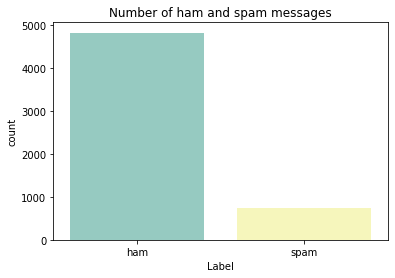

In [4]:
sns.countplot(df.v1,palette='Set3')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
# Split into training and test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [7]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len) # Padding the words to get equal length for all words in a sentence

In [8]:
sequences_matrix.shape


(4736, 150)

In [9]:
sequences_matrix.ndim

2

In [10]:
sequences_matrix = np.reshape(sequences_matrix,(4736,150,1))
sequences_matrix.ndim #3d shape verification to proceed to RNN LSTM

3

# 4) Create Model for RNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [12]:
model = Sequential()

# 5) Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [13]:
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

# 6)Compile the Model

In [14]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

# 7)Fit the model on the training data.

In [15]:
X = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)
X

Epoch 1/5
30/30 [==============================] - 26s 685ms/step - loss: 0.4328 - accuracy: 0.8696 - val_loss: 0.3586 - val_accuracy: 0.8650
Epoch 2/5
30/30 [==============================] - 19s 636ms/step - loss: 0.1765 - accuracy: 0.9374 - val_loss: 0.0902 - val_accuracy: 0.9757
Epoch 3/5
30/30 [==============================] - 19s 641ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 4/5
30/30 [==============================] - 19s 637ms/step - loss: 0.0336 - accuracy: 0.9905 - val_loss: 0.0806 - val_accuracy: 0.9800
Epoch 5/5
30/30 [==============================] - 19s 634ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0980 - val_accuracy: 0.9768


# 8)Save the model

In [16]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f149cf20a50>>

# 9)Evaluate the model on test set data.

In [17]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)

In [18]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 3s 54ms/step - loss: 0.1357 - accuracy: 0.9761


In [19]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.136
  Accuracy: 0.976
